In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
!cp '/content/drive/MyDrive/dataset.zip' .
!unzip dataset.zip

Archive:  dataset.zip
replace dataset/test/bald_eagle/023396cb25b3c3b42b.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [70]:
TRAIN_DIR = '/content/dataset/train'
TEST_DIR = '/content/dataset/test'

In [71]:
from tensorflow import keras
data_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.3)
train_data = data_generator.flow_from_directory(TRAIN_DIR, color_mode='grayscale', batch_size = 32, subset='training', target_size=(255,255))
validation_data = data_generator.flow_from_directory(TRAIN_DIR, color_mode='grayscale', batch_size = 32, subset='validation', target_size=(255,255))
data_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_data = data_generator.flow_from_directory(TEST_DIR, color_mode='grayscale', batch_size = 32, target_size=(255,255))

Found 1363 images belonging to 4 classes.
Found 582 images belonging to 4 classes.
Found 833 images belonging to 4 classes.


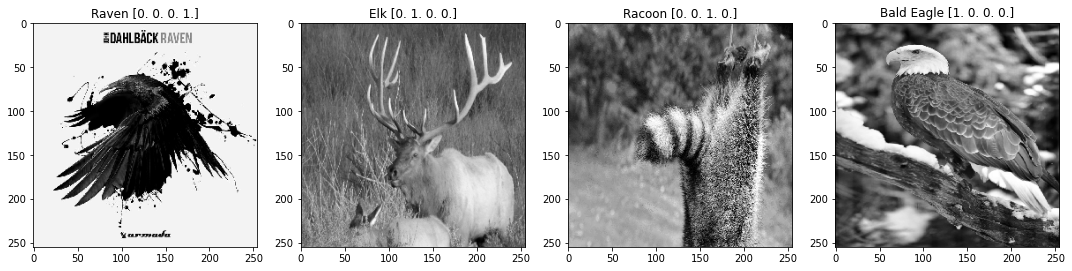

In [72]:
from matplotlib import pyplot as plot

images, labels = train_data.next()

plot.figure(figsize=(15,4))
im_label = {0:'Bald Eagle', 1:'Elk', 2:'Racoon', 3:'Raven'}
i = 1
for image, label in zip(images, labels):
  if label.argmax() in im_label:
    plot.subplot(1,4,i)
    plot.imshow(keras.preprocessing.image.array_to_img(image), cmap='gray')
    plot.title(im_label[label.argmax()] + ' '  + str(label))
    del im_label[label.argmax()]
    i += 1

plot.tight_layout()
plot.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


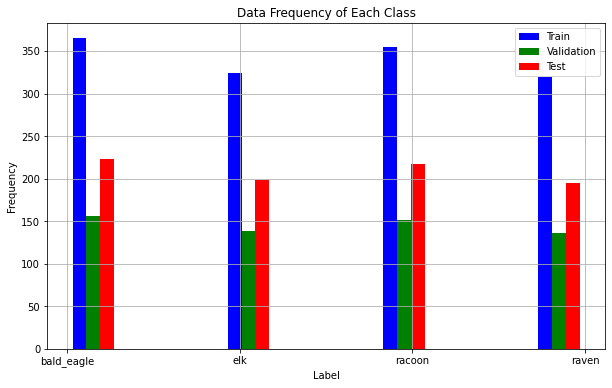

In [73]:
plot.figure(figsize=(10,6))
labels = (train_data.classes, validation_data.classes, test_data.classes)
plot.hist(labels, label=['Train', 'Validation', 'Test'], color=['b', 'g', 'r'])
plot.xlabel('Label')
plot.ylabel('Frequency')
plot.title('Data Frequency of Each Class')
loc = list(train_data.class_indices.values())
my_xticks = list(train_data.class_indices.keys())
plot.xticks(loc, my_xticks)
plot.legend()
plot.grid()
plot.show()

In [77]:
input_data = keras.layers.Input(shape=(255,255,1))

output = keras.layers.Flatten()(input_data)
output = keras.layers.Dense(1000, activation='relu')(output)
output = keras.layers.Dense(500, activation='relu')(output)
output = keras.layers.Dense(250, activation='relu')(output)
output = keras.layers.Dense(125, activation='relu')(output)
output = keras.layers.Dense(4, activation='softmax')(output)

model = keras.models.Model(inputs=input_data, outputs=output)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(train_data, validation_data=validation_data, epochs=20)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 255, 255, 1)]     0         
                                                                 
 flatten_5 (Flatten)         (None, 65025)             0         
                                                                 
 dense_18 (Dense)            (None, 5000)              325130000 
                                                                 
 dense_19 (Dense)            (None, 2500)              12502500  
                                                                 
 dense_20 (Dense)            (None, 1250)              3126250   
                                                                 
 dense_21 (Dense)            (None, 625)               781875    
                                                                 
 dense_22 (Dense)            (None, 4)                 2504

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 93s 2s/step - loss: 1.5196 - accuracy: 0.3023 - val_loss: 1.2970 - val_accuracy: 0.4210
Epoch 2/20
43/43 [==============================] - 92s 2s/step - loss: 1.2843 - accuracy: 0.3969 - val_loss: 1.2112 - val_accuracy: 0.4622
Epoch 3/20
43/43 [==============================] - 92s 2s/step - loss: 1.2222 - accuracy: 0.4409 - val_loss: 1.2934 - val_accuracy: 0.4158
Epoch 4/20
43/43 [==============================] - 91s 2s/step - loss: 1.1552 - accuracy: 0.4828 - val_loss: 1.4971 - val_accuracy: 0.3316
Epoch 5/20
43/43 [==============================] - 91s 2s/step - loss: 1.1250 - accuracy: 0.4894 - val_loss: 1.2426 - val_accuracy: 0.4777
Epoch 6/20
43/43 [==============================] - 91s 2s/step - loss: 1.0803 - accuracy: 0.5158 - val_loss: 1.0916 - val_accuracy: 0.5086
Epoch 7/20
43/43 [==============================] - 93s 2s/step - loss: 1.0744 - accuracy: 0.5326 - val_loss: 1.0262 - val_accuracy: 0.5842
Epoch 8/20
43/43 [=============